In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ar41_for_ulb.csv', sep=";")
df = df.drop_duplicates()

Drop duplicates

In [3]:
df_dropped = df.dropna()

Drop rows where both motors are off

In [4]:
df_motor_stopped = (df_dropped['RS_E_RPM_PC1'] == 0) & (df_dropped['RS_E_RPM_PC2'] == 0)
df_dropped = df_dropped[~df_motor_stopped] 




In [5]:
features = ['RS_E_InAirTemp', 'RS_E_OilPress', 'RS_E_RPM', 'RS_E_WatTemp', 'RS_T_OilTemp']

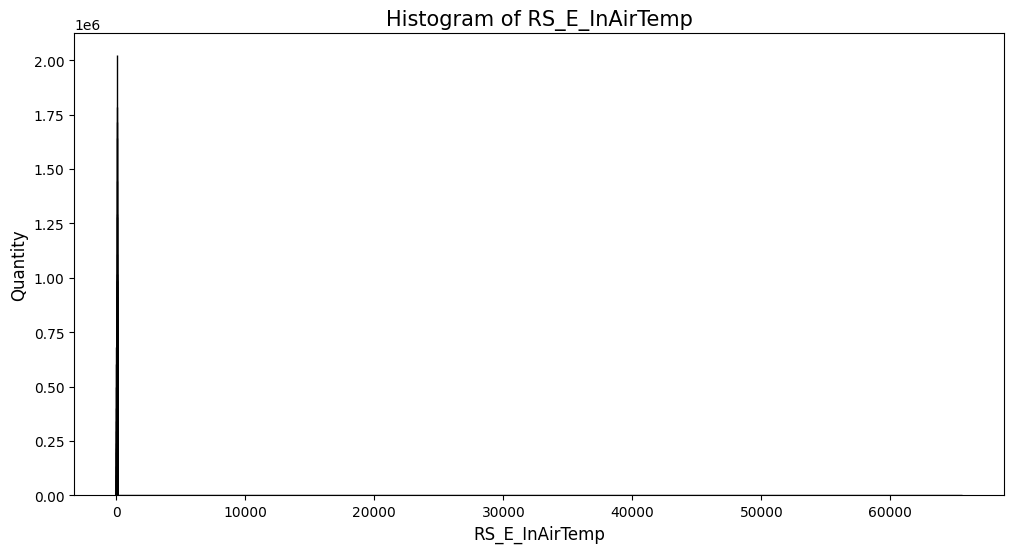

<Figure size 640x480 with 0 Axes>

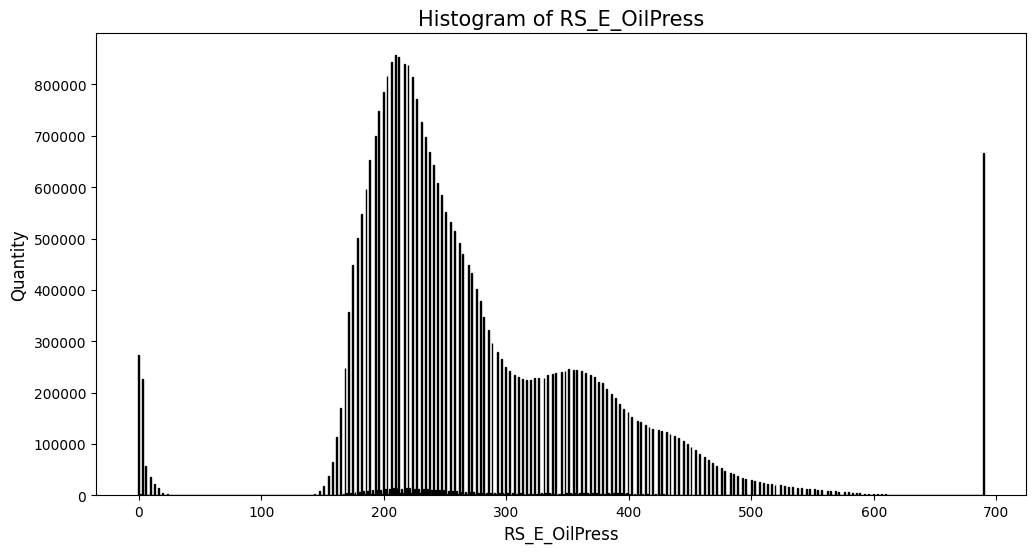

<Figure size 640x480 with 0 Axes>

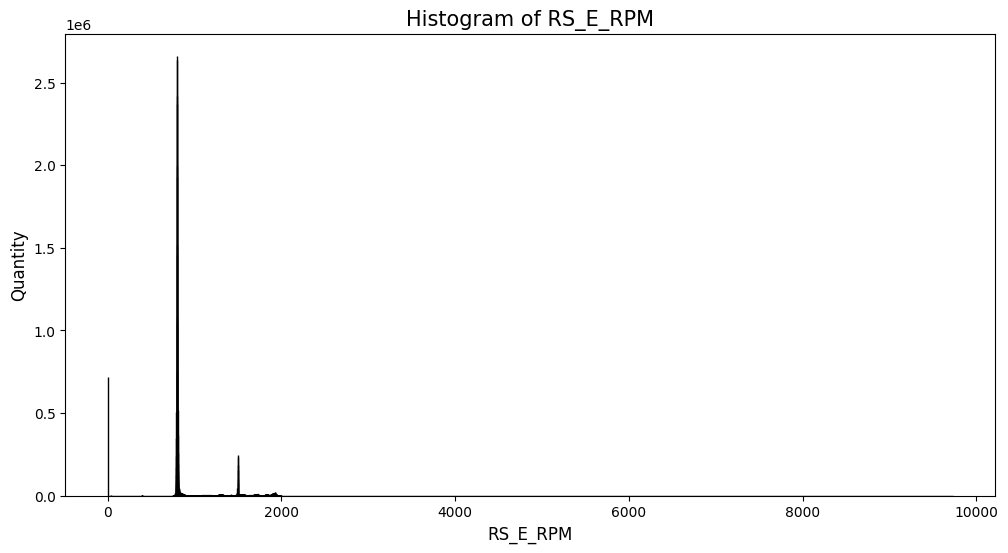

<Figure size 640x480 with 0 Axes>

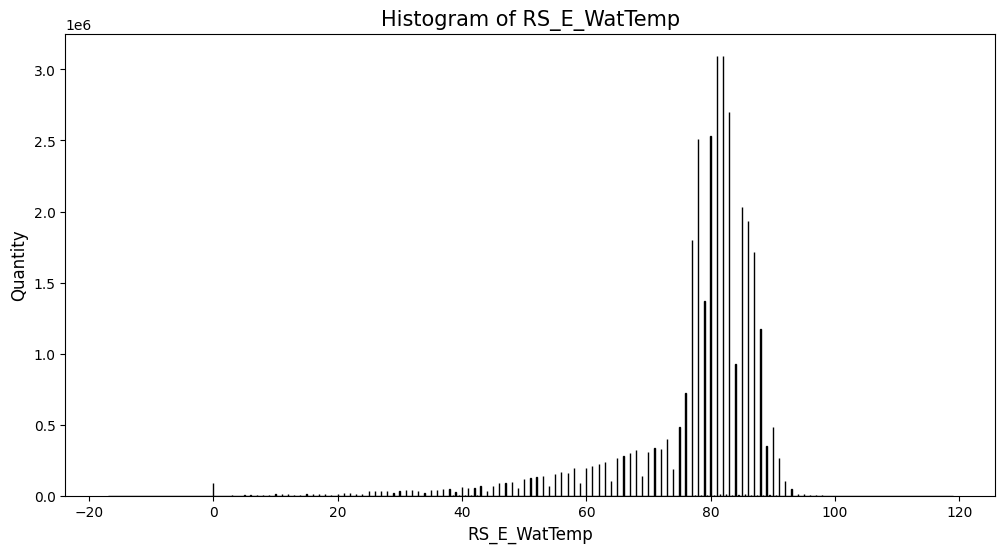

<Figure size 640x480 with 0 Axes>

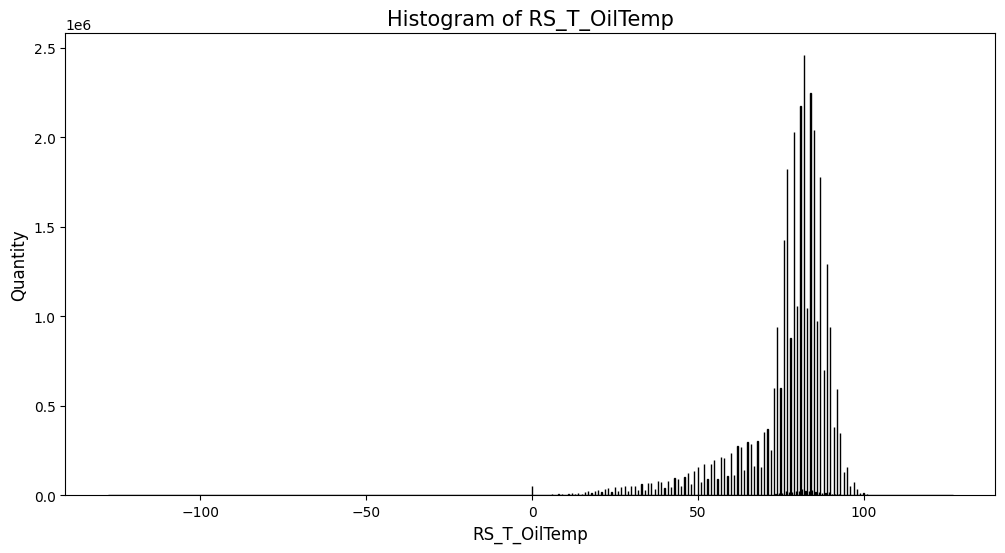

<Figure size 640x480 with 0 Axes>

In [6]:
for feature in features:
    pc1_values = df_dropped[f'{feature}_PC1']
    pc2_values = df_dropped[f'{feature}_PC2']
    combined_values = pd.concat([pc1_values, pc2_values])

    hist, bins = np.histogram(combined_values, bins='auto')

    plt.figure(figsize=(12, 6))
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), color='skyblue', edgecolor='black')

    plt.title(f'Histogram of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Quantity', size=12)

    plt.show()
    plt.savefig(f'explo/before_{feature}.png')
    

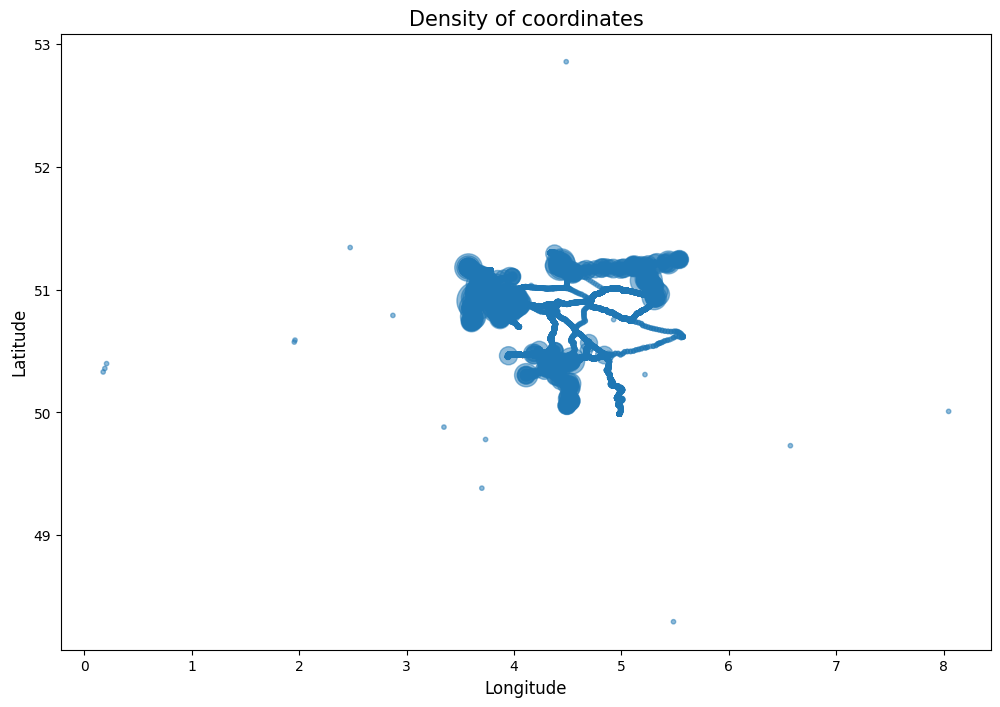

<Figure size 640x480 with 0 Axes>

In [7]:
location_counts = df.groupby(['lat', 'lon']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
plt.scatter(location_counts['lon'], location_counts['lat'], s=location_counts['count']*10, alpha=0.5)

plt.title('Density of coordinates', size=15)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

plt.show()
plt.savefig("explo/before_log.png")

Clean in_air_temp
- Remove values outside of range [0, 100] -> sensor problem : values outside are not possible

In [8]:
df_dropped = df_dropped[(df_dropped['RS_E_InAirTemp_PC1'] >= 0) & (df_dropped['RS_E_InAirTemp_PC1'] <= 100)]
df_dropped = df_dropped[(df_dropped['RS_E_InAirTemp_PC2'] >= 0) & (df_dropped['RS_E_InAirTemp_PC2'] <= 100)]

Clean oil_press


Clean RPM

In [9]:
df_dropped = df_dropped[(df_dropped['RS_E_RPM_PC1'] > 0) & (df_dropped['RS_E_RPM_PC1'] <= 2100)]
df_dropped = df_dropped[(df_dropped['RS_E_RPM_PC2'] > 0) & (df_dropped['RS_E_RPM_PC2'] <= 2100)]

Clean water_temp
- Remove values outside of range [0, 100] -> sensor problem : values outside are abnormal

In [10]:
df_dropped = df_dropped[(df_dropped['RS_E_WatTemp_PC1'] >= 0) & (df_dropped['RS_E_WatTemp_PC1'] <= 100)]
df_dropped = df_dropped[(df_dropped['RS_E_WatTemp_PC2'] >= 0) & (df_dropped['RS_E_WatTemp_PC2'] <= 100)]

Clean oil_temp
- Remove values outside of range [0, 150] -> sensor problem : values outside are abnormal

In [11]:
df_dropped = df_dropped[(df_dropped['RS_T_OilTemp_PC1'] >= 0) & (df_dropped['RS_T_OilTemp_PC1'] <= 150)]
df_dropped = df_dropped[(df_dropped['RS_T_OilTemp_PC2'] >= 0) & (df_dropped['RS_T_OilTemp_PC2'] <= 150)]

Clean coordinates

In [12]:
df_dropped = df_dropped[(df_dropped['lon'] >= 3.2) & (df_dropped['lon'] <= 6)]
df_dropped = df_dropped[(df_dropped['lat'] >= 49.5) & (df_dropped['lat'] <= 51.5)]

Plot after cleaning

In [13]:
print(len(df))
print(len(df_dropped))

17679273
16379974


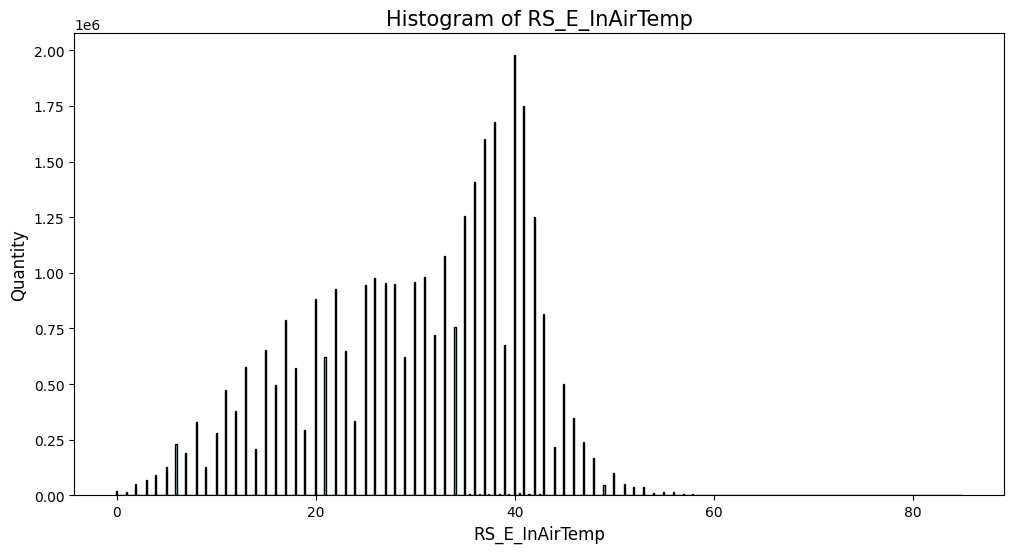

<Figure size 640x480 with 0 Axes>

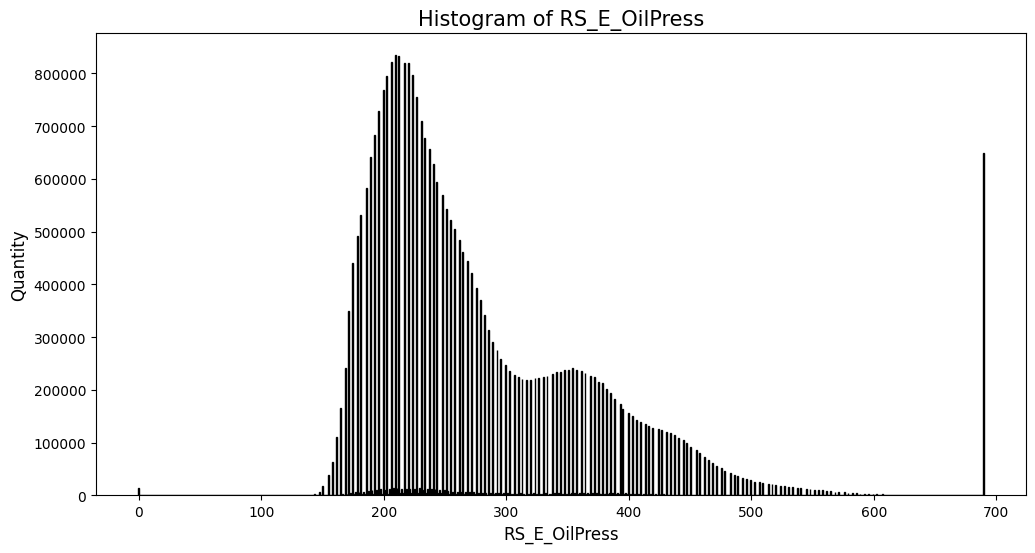

<Figure size 640x480 with 0 Axes>

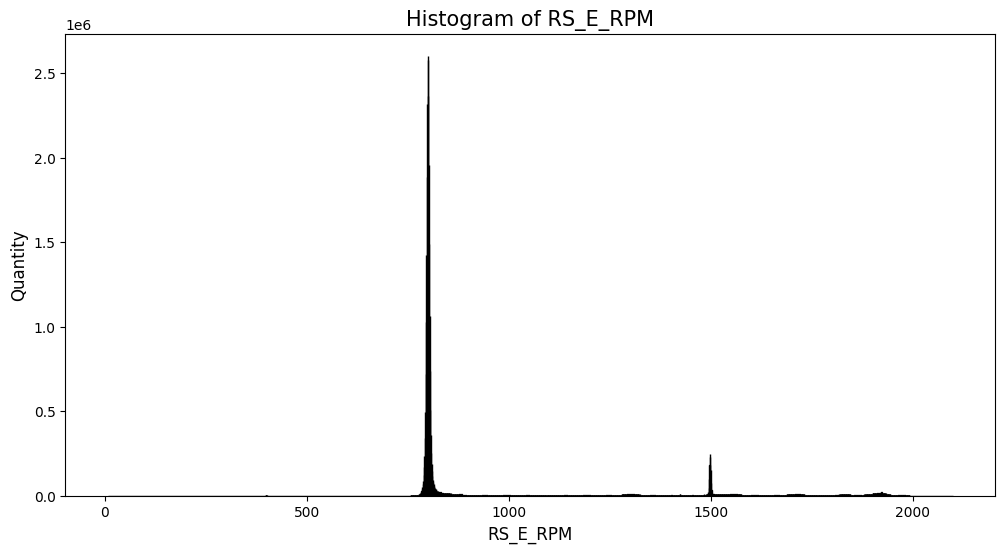

<Figure size 640x480 with 0 Axes>

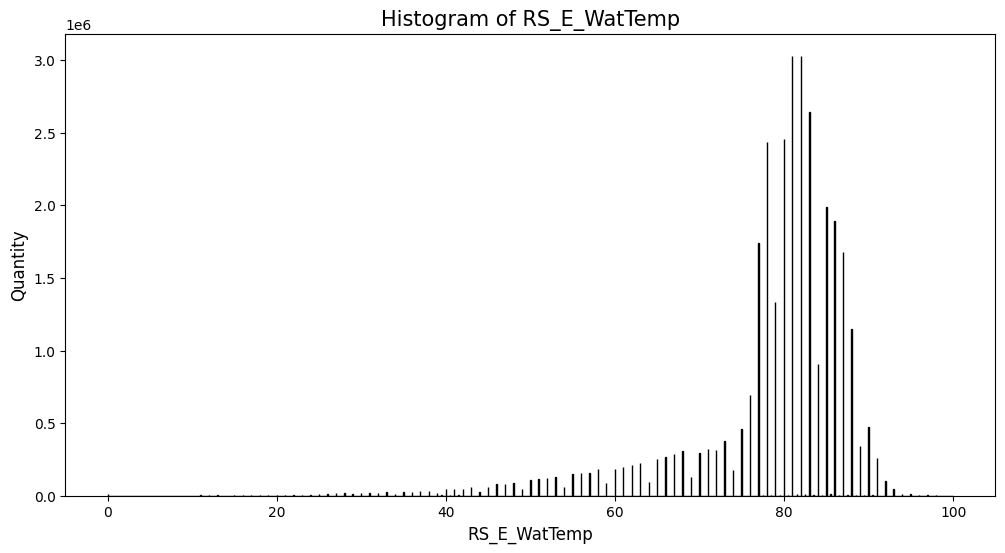

<Figure size 640x480 with 0 Axes>

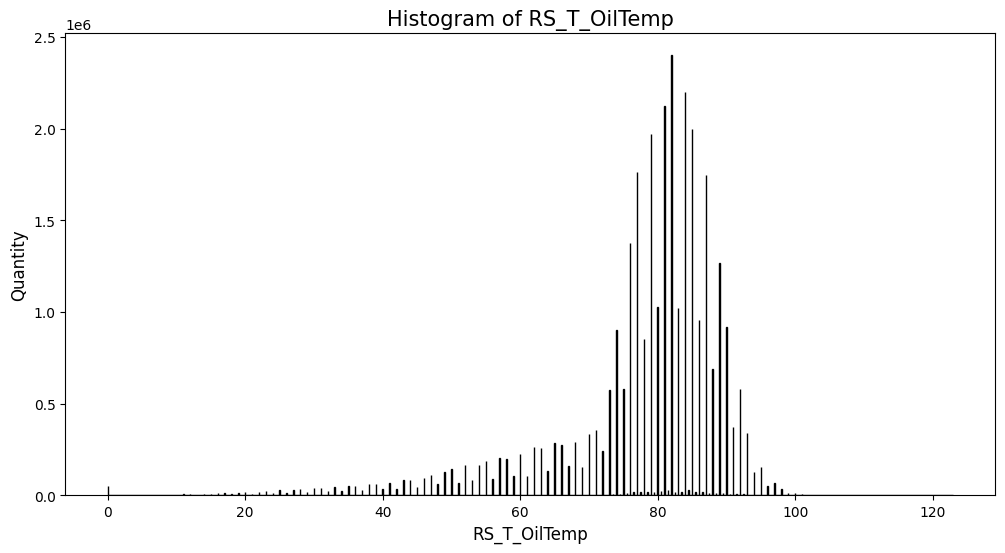

<Figure size 640x480 with 0 Axes>

In [14]:
for feature in features:
    pc1_values = df_dropped[f'{feature}_PC1']
    pc2_values = df_dropped[f'{feature}_PC2']
    combined_values = pd.concat([pc1_values, pc2_values])

    hist, bins = np.histogram(combined_values, bins='auto')

    plt.figure(figsize=(12, 6))
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), color='skyblue', edgecolor='black')

    plt.title(f'Histogram of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Quantity', size=12)

    plt.show()
    plt.savefig(f'explo/after_{feature}.png')

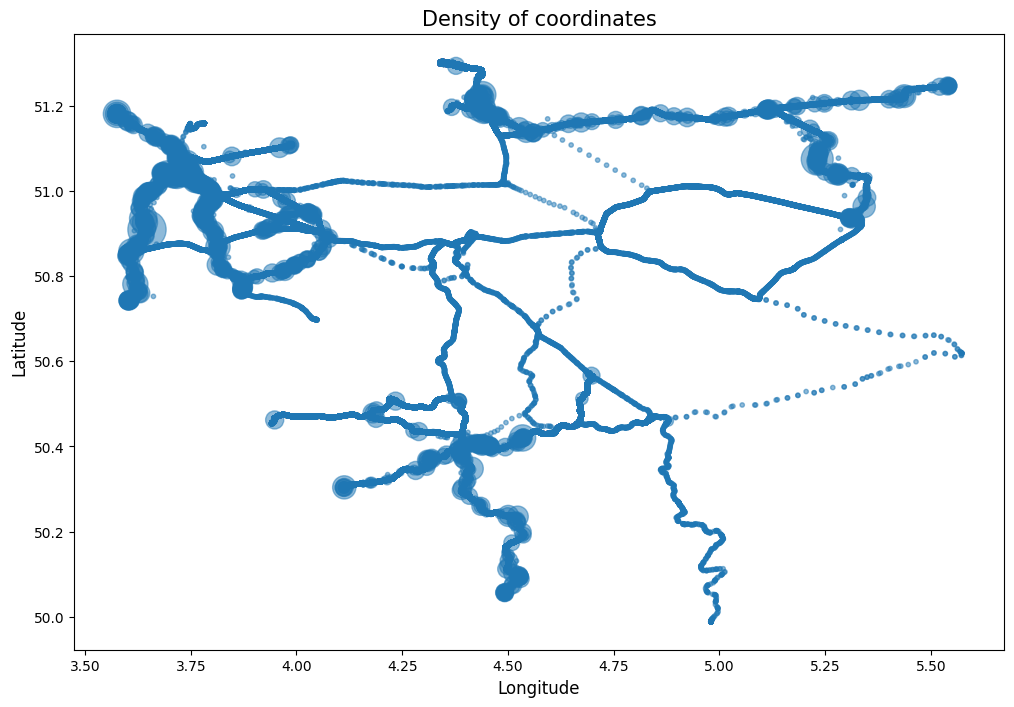

<Figure size 640x480 with 0 Axes>

In [15]:
location_counts = df_dropped.groupby(['lat', 'lon']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
plt.scatter(location_counts['lon'], location_counts['lat'], s=location_counts['count']*10, alpha=0.5)

plt.title('Density of coordinates', size=15)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

plt.show()
plt.savefig("explo/after_log.png")

In [16]:
df_dropped.to_csv('ar41_for_ulb_cleaned.csv', sep=";", index=False)